In [1]:
# Trazendo os importes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Entendimento do Negócio e contexto

Este projeto analisa os fatores que influenciam o custo do plano de saúde corporativo de uma empresa do setor alimentício com mais de 20 mil colaboradores no Brasil.

A pesquisa foi conduzida com 1.338 colaboradores selecionados aleatoriamente e contém informações sobre índice de massa corporal (IMC), hábito de fumar e quantidade de filhos.

A análise segue a metodologia CRISP-DM, aplicando técnicas de análise exploratória, associação e regressão linear para compreender quais fatores estão mais relacionados ao aumento do custo do plano e propor ações preventivas.


### 1.1 Objetivo

Quais fatores estão mais relacionados com o custo do plano de saúde?

Que ações preventivas podem ser implementadas para reduzir esse custo?

# 2. Entendimento dos dados

## 2.1. Descrição dos dados

Nesta etapa, buscamos compreender a estrutura e o conteúdo do conjunto de dados, identificando o tipo de cada variável, sua finalidade e possíveis relações entre elas. Essa análise inicial é essencial para direcionar as próximas etapas da exploração e garantir a qualidade dos dados.

In [2]:
# importando dados do arquivo excel
df = pd.read_excel('../data/base_plano_de_saude.xlsx', sheet_name= 'base')

In [3]:
df # Visualizando o dataframe completo

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude
0,19,Feminino,27.900,0,Sim,Centro,1688.492400
1,18,Masculino,33.770,1,Não,Sudeste,172.555230
2,28,Masculino,33.000,3,Não,Sudeste,444.946200
3,33,Masculino,22.705,0,Não,Norte,2198.447061
4,32,Masculino,28.880,0,Não,Norte,386.685520
...,...,...,...,...,...,...,...
1333,50,Masculino,30.970,3,Não,Norte,1060.054830
1334,18,Feminino,31.920,0,Não,Nordeste,220.598080
1335,18,Feminino,36.850,0,Não,Sudeste,162.983350
1336,21,Feminino,25.800,0,Não,Centro,200.794500


A base contém 1.338 registros e 7 colunas. Cada linha representa um colaborador. As variáveis apresentam tipos coerentes com o esperado (numéricos para IMC e custo, inteiros para filhos e categóricos para fumante). Não há colunas extras nem inconsistências de tipo.

In [4]:
df.head() # verificando as primeiras linhas do dataframe

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude
0,19,Feminino,27.900,0,Sim,Centro,1688.492400
1,18,Masculino,33.770,1,Não,Sudeste,172.555230
2,28,Masculino,33.000,3,Não,Sudeste,444.946200
3,33,Masculino,22.705,0,Não,Norte,2198.447061
4,32,Masculino,28.880,0,Não,Norte,386.685520


In [5]:
df.columns # verificando as colunas do dataframe

Index(['Idade', 'Sexo', 'IMC', 'Qte_Filhos', 'Fumante', 'Região',
       'Custo_Saude'],
      dtype='object')

In [6]:
df.info() # verificando informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Idade        1338 non-null   int64  
 1   Sexo         1338 non-null   object 
 2   IMC          1338 non-null   float64
 3   Qte_Filhos   1338 non-null   int64  
 4   Fumante      1338 non-null   object 
 5   Região       1338 non-null   object 
 6   Custo_Saude  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum() # verificando valores nulos no dataframe

Idade          0
Sexo           0
IMC            0
Qte_Filhos     0
Fumante        0
Região         0
Custo_Saude    0
dtype: int64

Não há nenhum valores ausentes

In [8]:
df.isnull().sum() # verificando valores nulos no dataframe

Idade          0
Sexo           0
IMC            0
Qte_Filhos     0
Fumante        0
Região         0
Custo_Saude    0
dtype: int64

In [9]:
df.duplicated().sum() # verificando valores duplicados no dataframe

np.int64(1)

In [10]:
df[df.duplicated(keep = False)] 

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude
195,19,Masculino,30.59,0,Não,Norte,163.95631
581,19,Masculino,30.59,0,Não,Norte,163.95631


In [11]:
df.describe() # Verificando se há valores inconsistentes ou fora do esperado nas (variáveis quantitativas)

,Idade,IMC,Qte_Filhos,Custo_Saude
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1327.042227
std,14.049960,6.098187,1.205493,1211.001124
min,18.000000,15.960000,0.000000,112.187390
25%,27.000000,26.296250,0.000000,474.028715
50%,39.000000,30.400000,1.000000,938.203300
75%,51.000000,34.693750,2.000000,1663.991252
max,64.000000,53.130000,5.000000,6377.042801


In [12]:
# Verificando se há valores inconsistentes ou fora do esperado nas (variáveis qualitativas)
df['Sexo'].value_counts(),df['Fumante'].value_counts(),df['Região'].value_counts()


(Sexo
 Masculino    676
 Feminino     662
 Name: count, dtype: int64,
 Fumante
 Não    1064
 Sim     274
 Name: count, dtype: int64,
 Região
 Sudeste     364
 Centro      325
 Norte       325
 Nordeste    324
 Name: count, dtype: int64)

Sanity check concluído. A base possui 1.338 registros e 7 colunas. Após a verificação de duplicidades, 1 registro duplicado apareceu, mas como não temos informação se realmente é um colaborador que possui as mesmas características, ou se foi uma mesma resposta pra colaborador.

Não possui também valores nulos ou ausentes.

Os tipos de dados estão coerentes com o esperado.

Dicionário dos dados (metadados)

In [13]:
#Criando o dicionário de metadados

df_meta_dados = pd.DataFrame({
    'Variável': ['Idade', 'Sexo', 'IMC', 'Filhos', 'Fumante', 'Região', 'Custo'],
    'Descrição': [
        'Idade do colaborador em anos',
        'Sexo do colaborador (masculino ou feminino)',
        'Índice de Massa Corporal (IMC) do colaborador',
        'Número de filhos/dependentes do colaborador',
        'Indica se o colaborador é fumante (sim ou não)',
        'Região geográfica onde o colaborador reside',
        'Custo anual dos cuidados de saúde do colaborador em dólares'
    ],
    'Tipo de Dado': [
        'Inteiro',
        'Categórico',
        'Numérico (float)',
        'Inteiro',
        'Categórico',
        'Categórico',
        'Numérico (float)'
    ],
    'Tipo de Variável': [
        'Quantitativa Discreta',
        'Qualitativa Nominal',
        'Quantitativa Contínua',
        'Quantitativa Discreta',
        'Qualitativa Nominal',
        'Qualitativa Nominal',
        'Quantitativa Contínua'
    ]})
#Exibindo o dicionário de metadados
df_meta_dados

,Variável,Descrição,Tipo de Dado,Tipo de Variável
0,Idade,Idade do colaborador em anos,Inteiro,Quantitativa Discreta
1,Sexo,Sexo do colaborador (masculino ou feminino),Categórico,Qualitativa Nominal
2,IMC,Índice de Massa Corporal (IMC) do colaborador,Numérico (float),Quantitativa Contínua
3,Filhos,Número de filhos/dependentes do colaborador,Inteiro,Quantitativa Discreta
4,Fumante,Indica se o colaborador é fumante (sim ou não),Categórico,Qualitativa Nominal
5,Região,Região geográfica onde o colaborador reside,Categórico,Qualitativa Nominal
6,Custo,Custo anual dos cuidados de saúde do colaborad...,Numérico (float),Quantitativa Contínua


Para deixar organizado, irei exportar esse dicionario para conter na nossa base

In [14]:
#Exportando o dicionário de metadados para um arquivo excel
df_meta_dados.to_excel('../data/dicionario_de_metadados.xlsx', index =False)

### 2.1.1 Transformação dos dados

Para facilitar a análise, foi criada a variável Faixa de IMC, que agrupa os valores individuais de IMC conforme as faixas de classificação definidas pela Organização Mundial da Saúde (OMS).

In [15]:
#Criando a variável de faixa de IMC
df['Faixa_IMC'] = pd.cut(df['IMC'],
                        bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                        labels = [
                            'Abaixo do peso',
                            'Peso normal',
                            'Sobrepeso',
                            'Obesidade grau I',
                            'Obesidade grau II',
                            'Obesidade grau III',
                        ],
                        right = True,
)
df.head()

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude,Faixa_IMC
0,19,Feminino,27.900,0,Sim,Centro,1688.492400,Sobrepeso
1,18,Masculino,33.770,1,Não,Sudeste,172.555230,Obesidade grau I
2,28,Masculino,33.000,3,Não,Sudeste,444.946200,Obesidade grau I
3,33,Masculino,22.705,0,Não,Norte,2198.447061,Peso normal
4,32,Masculino,28.880,0,Não,Norte,386.685520,Sobrepeso


In [16]:
df.value_counts(['Faixa_IMC'])

Faixa_IMC         
Obesidade grau I      397
Sobrepeso             380
Obesidade grau II     226
Peso normal           221
Obesidade grau III     93
Abaixo do peso         21
Name: count, dtype: int64

## 2.2 Análise Exploratória (EDA)

### 2.2.1 Análise Univariada

#### 2.2.1.1 Análise univariada das variáveis quantitativas

Nesta etapa da análise exploratória, é realizada a **avaliação univariada das variáveis quantitativas**, com o objetivo de compreender a distribuição, dispersão e possíveis padrões em cada uma delas.  
A análise inclui a observação de medidas descritivas, como média, mediana, quartis e desvio-padrão e a identificação de valores atípicos que possam influenciar interpretações futuras.

Criando o dataframe com as variáveis quantitativas,

In [17]:
variaveis_quantitativas = df.select_dtypes(include=['int64', 'float64']) # Selecionando variáveis quantitativas
variaveis_quantitativas.describe() # Análise descritiva das variáveis quantitativas

,Idade,IMC,Qte_Filhos,Custo_Saude
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1327.042227
std,14.049960,6.098187,1.205493,1211.001124
min,18.000000,15.960000,0.000000,112.187390
25%,27.000000,26.296250,0.000000,474.028715
50%,39.000000,30.400000,1.000000,938.203300
75%,51.000000,34.693750,2.000000,1663.991252
max,64.000000,53.130000,5.000000,6377.042801


In [18]:
variaveis_quantitativas.head() # Verificando as primeiras linhas das variáveis quantitativas

,Idade,IMC,Qte_Filhos,Custo_Saude
0,19,27.900,0,1688.492400
1,18,33.770,1,172.555230
2,28,33.000,3,444.946200
3,33,22.705,0,2198.447061
4,32,28.880,0,386.685520


*Medidas resumo das variáveis quantitativa*

In [19]:
variaveis_quantitativas.describe()

,Idade,IMC,Qte_Filhos,Custo_Saude
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1327.042227
std,14.049960,6.098187,1.205493,1211.001124
min,18.000000,15.960000,0.000000,112.187390
25%,27.000000,26.296250,0.000000,474.028715
50%,39.000000,30.400000,1.000000,938.203300
75%,51.000000,34.693750,2.000000,1663.991252
max,64.000000,53.130000,5.000000,6377.042801


In [20]:
def graficos_quantitativos(df, colunas): #Função para plotar boxplots e histogramas para variáveis numéricas
    sns.set(style="white", palette="pastel") #Configuração do estilo dos gráficos

    fig, axes = plt.subplots(2, len(colunas), figsize=(4 * len(colunas), 6)) #2 linhas, n colunas

    fig.suptitle('Boxplots e Histogramas das Variáveis Numéricas', fontsize=18) #Título geral da figura

    for i, col in enumerate(colunas):
        # desenhar o boxsplot na primeira linha (linha 0)
        sns.boxplot(
            y=df[col],
            ax=axes[0, i],  #posição da linha 0, coluna i
            color=sns.color_palette("pastel")[i % 10], #definindo a cor do boxplot, ciclo de 10 cores dentro do palette (paleta)
            showmeans = True, # mostrando a média no boxplot
            meanprops = {"marker": "+", "markeredgecolor": "black", "markersize":10} #definindo as propriedades da média no boxplot
        )
        sns.histplot(
            df[col],
            ax = axes[1,i], #posição da linha 1, coluna i
            color = sns.color_palette("pastel")[i % 10],
            edgecolor = 'black'
        )
        axes[0, i].set_ylabel(col) #definindo o label do eixo y do boxplot
        axes[0, i].set_xlabel("") #definindo o label do eixo x do boxplot
        axes[1, i].set_ylabel("Frequência") #definindo o label do eixo y do histograma
        axes[1, i].set_xlabel(col) #definindo o label do eixo x do histograma
    plt.tight_layout(rect = [0, 0, 1, 0.95]) #ajustando o layout para não sobrepor com o título geral
    plt.subplots_adjust(hspace=0.5) #ajustando o espaçamento entre os subplots
    plt.show()

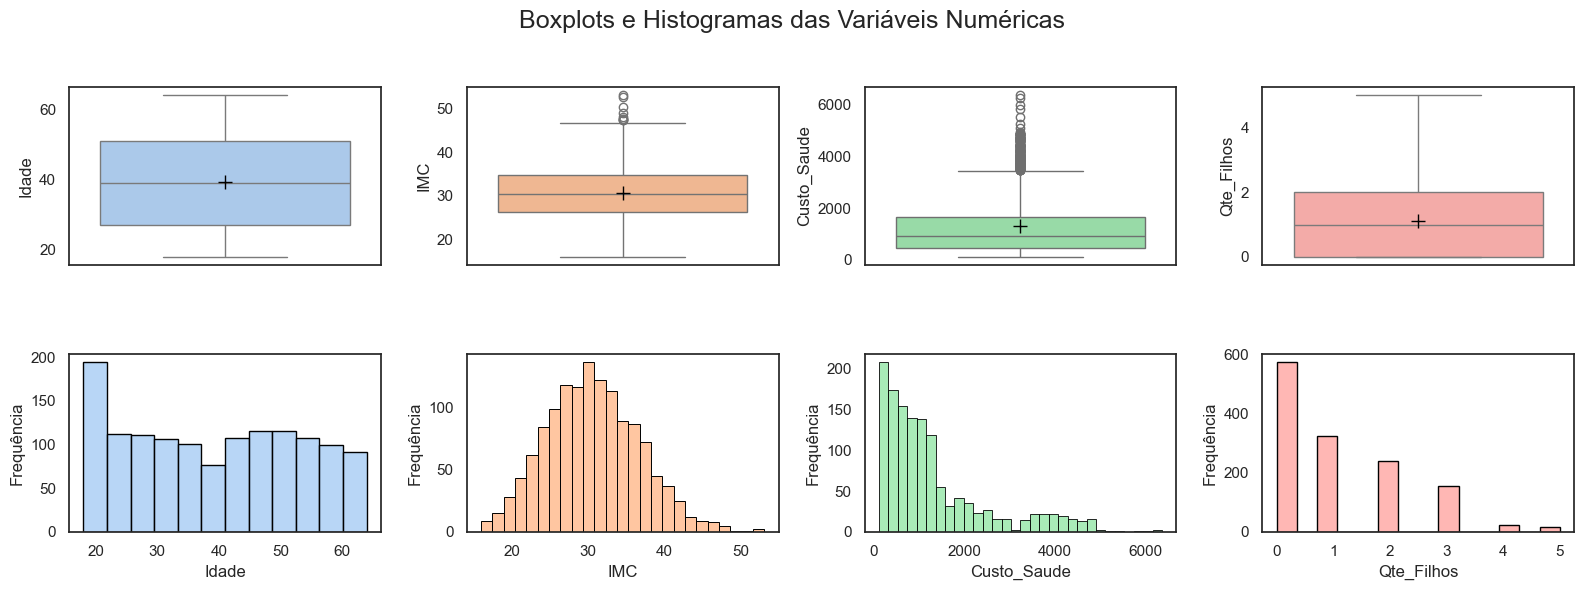

In [21]:
graficos_quantitativos(variaveis_quantitativas, ['Idade', 'IMC', 'Custo_Saude', 'Qte_Filhos']) #Chamando a função para plotar os gráficos de variáveis quantitativas

***Observações e Insights***

- **Idade**
    - Idade dos indivíduos varia entre 18 e 64 anos
    - Média e mediana estão muito proximas (39 anos), indicando uma distribuição simétrica (no caso, uniforme)
    - 50% da amostra possui idade entre 27 e 51 ano
    - Desvio padrão de 14 anos, uma dispersão moderada.
- **IMC (Indice de Massa Corporal)**
    - Distribuição aproximada da normal (concentração dos valores na média)
    - Concentração de valores entre 26 e 35, com alguns casos acima de 45 (outliers visiveis no boxsplot) - O que caracteriza a amostra 50% na faixa de sobrepeso(será detalhado melhor quando for feita a análise com a tabela de classificação da OMS (Organização Mundial da Saude))
    - Desvio padrão de 6,1 sugere variação razoável entre os indivíduos
- **Quantidade de Filhos**
    - Média de filhos é de 1
    - Mediana de 1, significa que a amostra possui a maioria com nenhum filho, o que é comum em população mais jovens ou urbanas
    - "Zero-inflada" é importante para modelagem, pode afetar a escolha do tipo de regressão
- **Custo com Saúde** 
    - Variável mais dispersa e assimétrica do conjunto
    - Metade dos indivíduos gasta até `R$938,00`. E casos que chegam até `R$6.377,00`
    - Média de `R$1.327` é significamente maior que a mediana de `R$938,00`, justamente por causa dos valores extremos
    - Esses outliers representam um pequeno grupo de valores muito elevado, que podem ter condições cronicas, devem ser analisados com atenção, pois influenciam muito a média



#### 2.2.1.2 Análise univariada das variáveis qualitativas

Nesta etapa, analisamos as **variáveis qualitativas (ou categóricas)** do conjunto de dados, com o objetivo de compreender a distribuição das categorias e identificar padrões de predominância entre os grupos.  
Essa análise permite observar, por exemplo, a proporção de fumantes, a distribuição entre os sexos, as regiões de residência dos beneficiários e as faixas de IMC classificadas segundo a **Organização Mundial da Saúde (OMS)**.  

Os gráficos de barras são utilizados para representar visualmente essas proporções, facilitando a interpretação dos dados e destacando eventuais desequilíbrios entre categorias.

In [22]:
variaveis_quantitativas.describe()

,Idade,IMC,Qte_Filhos,Custo_Saude
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1327.042227
std,14.049960,6.098187,1.205493,1211.001124
min,18.000000,15.960000,0.000000,112.187390
25%,27.000000,26.296250,0.000000,474.028715
50%,39.000000,30.400000,1.000000,938.203300
75%,51.000000,34.693750,2.000000,1663.991252
max,64.000000,53.130000,5.000000,6377.042801


In [23]:
variaveis_qualitativas = df.select_dtypes(include=['object', 'category']) # Selecionando variáveis qualitativas
variaveis_qualitativas.head() # Verificando as primeiras linhas das variáveis qualitativas

,Sexo,Fumante,Região,Faixa_IMC
0,Feminino,Sim,Centro,Sobrepeso
1,Masculino,Não,Sudeste,Obesidade grau I
2,Masculino,Não,Sudeste,Obesidade grau I
3,Masculino,Não,Norte,Peso normal
4,Masculino,Não,Norte,Sobrepeso


Criando uma função para o calculo da tabela de frequência para as variáveis qualitativas

In [24]:
def tabela_frequencia(df,coluna, ordem = None):
    """
    Gera uma tabela de frequências absoluta, relativa e acumulada para uma coluna com variável qualitativa de um DataFrame.
    Para uma variável qualitativa, com opção de definir a ordem
    Parâmetros:
    --- ---------
    df: pd.DataFrame
        DataFrame contendo os dados.
    coluna : str
        Nome da coluna(variável qualitativa) para ser analsiada
    ordem : list, opcional
        Ordem personalizada para os valores da variável qualitativa.

    Retorna:
    --- -------
    pd.DataFrame
        Tabela de frequências com colunas para frequência absoluta, relativa (%) e acumulada (%).
    """
    #Frequências
    freq_abs = df[coluna].value_counts()
    freq_relativa = (df[coluna].value_counts(normalize=True) * 100).round(2)

    #Montando a tabela inicial
    tabela_frequencias = pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa (%)': freq_relativa
    })
    if ordem is not None:
        tabela_frequencias = tabela_frequencias.reindex(ordem)
    
    #Recalculando a frequencia acumulada com base na nova ordem
    tabela_frequencias['Frequência Acumulada (%)'] = tabela_frequencias['Frequência Relativa (%)'].cumsum().round(2)

    #Definindo o nome do índice
    tabela_frequencias.index.name = coluna

    return tabela_frequencias

*Tabela de frequências*

In [25]:
from IPython.display import display

ordem_faixa_imc = [
    'Abaixo do peso',
    'Peso normal',
    'Sobrepeso',
    'Obesidade grau I',
    'Obesidade grau II',
    'Obesidade grau III',
]

for col in ['Sexo', 'Fumante', 'Região', 'Faixa_IMC']:
    if col == 'Faixa_IMC':
        display(tabela_frequencia(df, col, ordem=ordem_faixa_imc))
    else:
        display(tabela_frequencia(df, col))


,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada (%)
Sexo,,,
Masculino,676,50.52,50.52
Feminino,662,49.48,100.00


,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada (%)
Fumante,,,
Não,1064,79.52,79.52
Sim,274,20.48,100.00


,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada (%)
Região,,,
Sudeste,364,27.20,27.20
Centro,325,24.29,51.49
Norte,325,24.29,75.78
Nordeste,324,24.22,100.00


,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada (%)
Faixa_IMC,,,
Abaixo do peso,21,1.57,1.57
Peso normal,221,16.52,18.09
Sobrepeso,380,28.40,46.49
Obesidade grau I,397,29.67,76.16
Obesidade grau II,226,16.89,93.05
Obesidade grau III,93,6.95,100.00


In [26]:
def graficos_qualitativos(df,colunas):  # Função para plotar gráficos de barras para variáveis categóricas
    sns.set(style="white", palette="pastel") #Configuração do estilo dos gráficos

    fig, axes = plt.subplots(1, len(colunas), figsize=(5 * len(colunas), 6.5)) #1 linha, n colunas
    fig.suptitle('Gráficos de Barras das Variáveis Categóricas', fontsize=18) #Título geral da figura

    if len (colunas) == 1:
        axes = [axes]  # Garantir que axes seja sempre uma lista mesmo com uma única coluna
    
    for i, col in enumerate(colunas):

        sns.countplot(
            x=df[col],
            ax=axes[i],
            order=df[col].value_counts().index,  # Ordenar as barras pela frequência
            color = "#89CFF0",
            edgecolor='black',
        )

        total = len (df[col])  # Total de observações para calcular a porcentagem
        
        for p in axes[i].patches:
            height = p.get_height()
            percentage = f'{100 * height / total:.1f}%'  # Calculando a porcentagem
            axes[i].text(
                p.get_x() + p.get_width() / 2,  # Posição x do texto (centro da barra)
                height + (total* 0.01),
                f'{int(height)} \n({percentage})',  # Texto a ser exibido
                ha='center', va ='bottom', fontsize=9
            )

        axes[i].set_ylim(0, max([p.get_height() for p in axes[i].patches]) * 1.15)  # Ajustando o limite do eixo y para melhor visualização
        axes[i].set_ylabel("Frequência")  # Definindo o label do eixo y
        axes[i].set_xlabel(col)  # Definindo o label do eixo x
        
        for label in axes[i].get_xticklabels():
            label.set_rotation(30)
            label.set_ha('right')
    plt.tight_layout(rect=[0, 0, 1, 0.93])  # Ajustando o layout para não sobrepor com o título geral
    plt.subplots_adjust(wspace=0.25)  # Ajustando o espaçamento entre os subplots
    plt.show()

*Gráficos de barras das variáveis qualitativas*

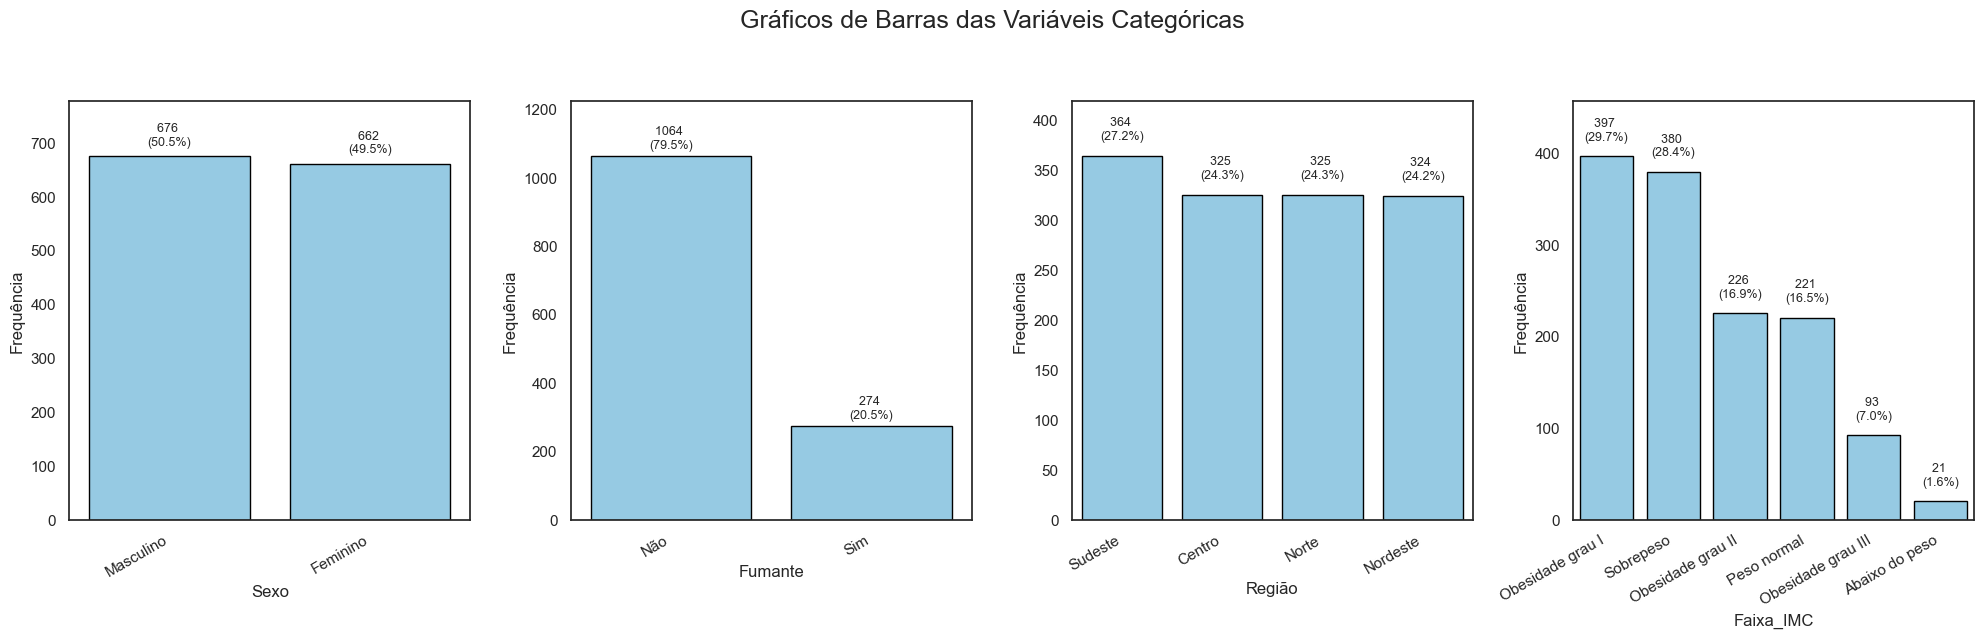

In [27]:
graficos_qualitativos(variaveis_qualitativas, ['Sexo', 'Fumante', 'Região', 'Faixa_IMC']) #Chamando a função para plotar os gráficos de variáveis qualitativas

***Observações e Insights***

- **Sexo**
    - Equilibro entre sexos masculinos e femininos na amostra. Base bem equilibrada, reduz viés por gênero nas análises
- **Fumante**
    - Quase 1 em cada 5 dos colaboradores (20%) da amostra é fumante.  É um grupo menor, mas importante, costuma ter custos de saúde mais altos.
- **Região**
    - Região sem muita desperidade, praticamente a mesma frequencia de colaboradores por região. A região, sozinha, nao explica grandes diferenças
- **Faixa de IMC**
    - Quase 80% dos funcionarios estão fora do peso normal segundo a OMS, o que pode explicar os custos com saúde. Consequentemente pode termaior custo de saúde pra quem tem IMC mais alto





## 2.2.2 Análise Bivariada

#### 2.2.2.1 Análise bivariada entre as variáveis quantitativas 

**Correlação**

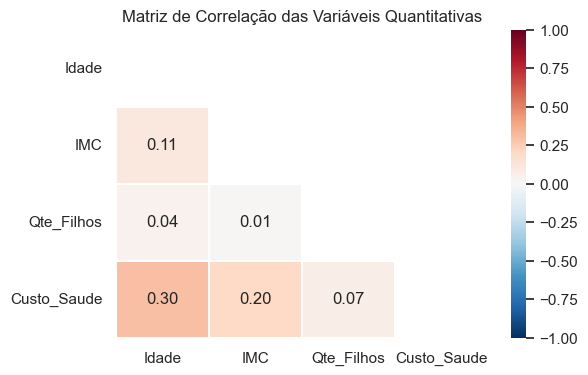

In [28]:
correlacao = variaveis_quantitativas.corr(numeric_only = True) # Calculando a matriz de correlação

mask = np.triu(np.ones_like(correlacao, dtype=bool)) # Máscara para ocultar a parte superior da matriz

# Plotando o heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    correlacao,
    mask = mask,         # Oculta a parte superior da matriz
    annot=True,          # Mostra os valores dentro das células
    cmap = 'RdBu_r',     # Paleta de cores (vermelho = positivo, azul = negativo)
    fmt=".2f",           # Duas casas decimais
    vmin = -1,          # Valor mínimo do mapa de cores
    vmax = 1,           # Valor máximo do mapa de cores
    center =0,        # Centraliza o mapa de cores em zero
    linewidths=0.05,      # Linhas entre as células
    cbar_kws={"shrink": 1} # Ajusta o tamanho da barra lateral
)

plt.title('Matriz de Correlação das Variáveis Quantitativas', fontsize=12)
plt.show()

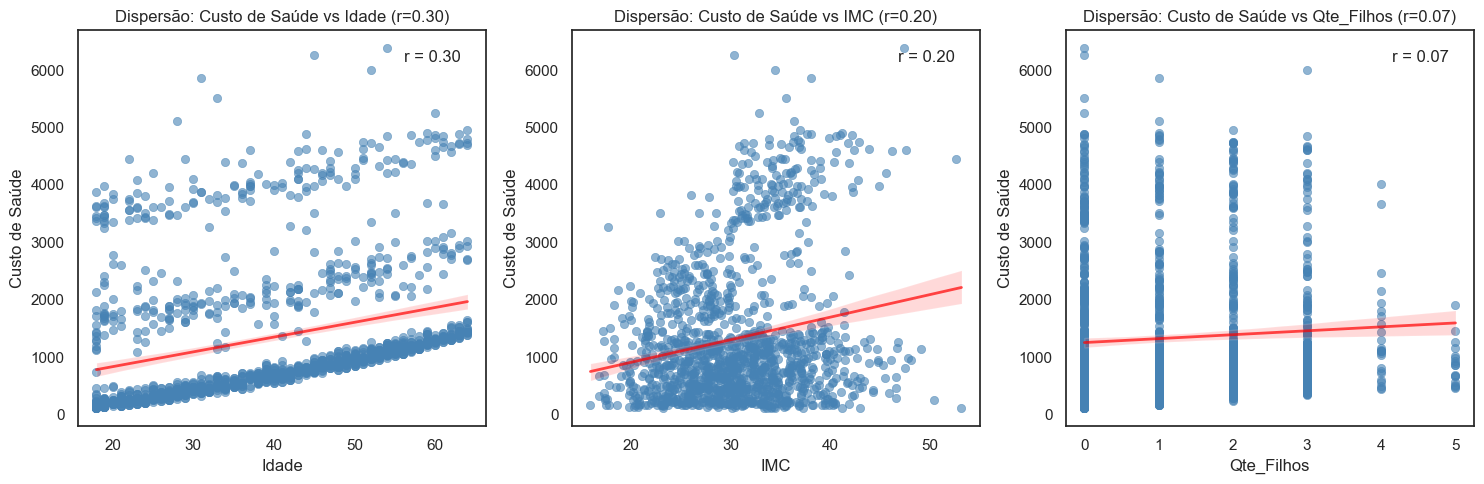

In [29]:
# Gráficos de dispersão com linha de tendência para variáveis quantitativas vs Custo_Saude

variaveis_quantitativas = ['Idade', 'IMC', 'Qte_Filhos']
plt.figure(figsize=(5 * len(variaveis_quantitativas), 5)) # Tamanho da figura baseado no número de variáveis

for i, col in enumerate(variaveis_quantitativas, 1): # Iniciando o loop com índice começando em 1
    plt.subplot(1, len(variaveis_quantitativas), i) # Configurando o subplot - 1 número de linhas, len(variaveis_quantitativas) número de colunas, i índice atual
    sns.scatterplot( #grafico de dispersão
        data=df, #dados do dataframe
        x=col, # variável no eixo x
        y='Custo_Saude', # variável no eixo y
        alpha=0.6, # transparência dos pontos
        color='steelblue', # cor dos pontos
        edgecolor=None # sem borda nos pontos
    )
    sns.regplot(  # linha de tendência
        data=df, # dados do dataframe
        x=col, # variável no eixo x
        y='Custo_Saude', # variável no eixo y
        scatter=False, # não desenha os pontos novamente
        color='red', # cor da linha de tendência
        line_kws={'lw': 2, 'alpha': 0.7} # largura e transparência da linha
    )
    r = df[col].corr(df['Custo_Saude']) # calculando o coeficiente de correlação

    plt.text( # adicionando o texto no gráfico
        0.80,.95, # posição do texto (5% da largura, 95% da altura)
        f'r = {r:.2f}', # duas casas decimais
        transform=plt.gca().transAxes, # coordenadas relativas ao eixo
        ha = 'left', va='top', # alinhamento do texto

    )
    plt.title(f'Dispersão: Custo de Saúde vs {col} (r={r:.2f})', fontsize=12) # título do gráfico
    plt.xlabel(col) # label do eixo x
    plt.ylabel('Custo de Saúde') # label do eixo y

plt.tight_layout() # ajustando o layout para evitar sobreposição
plt.show() # exibindo os gráficos


- ***Insights e Observações***

    - **Idade**: apresenta correlação baixa, mas existe uma tendência linear geral. O gráfico mostra “patamares”, sugerindo que o custo pode variar por faixas etárias. É um ponto que merece investigação mais detalhada.
    - **IMC**: também possui correlação baixa, mas o gráfico indica dois grupos distintos. Um com relação mais clara entre IMC e custo, e outro sem padrão definido. Pode haver fatores adicionais influenciando essa diferença.
    - **Quantidade de filhos**: muito dispersa, sem padrão linear aparente. Não mostra relação consistente com o custo
    

#### 2.2.2.2 Análise bivariada entre as variáveis qualitativas

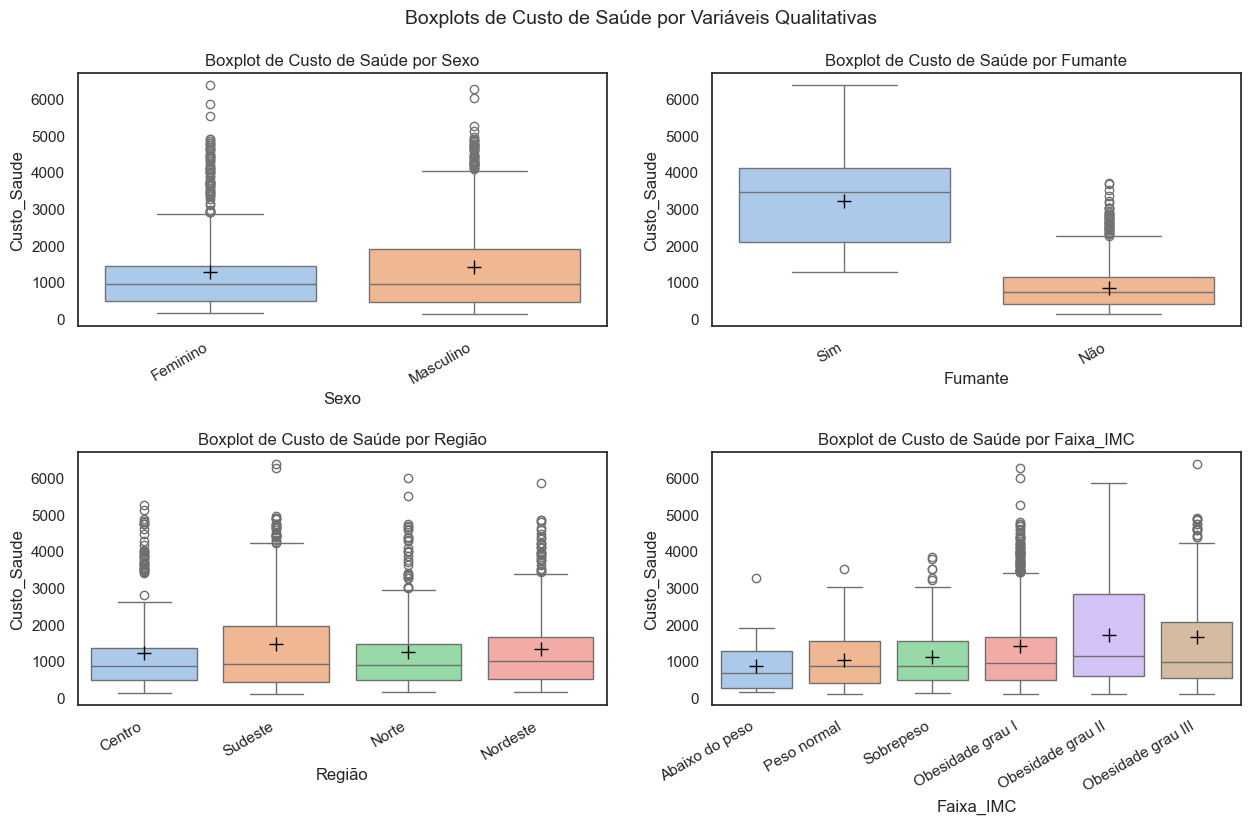

In [30]:
sns.set(style="white", palette="pastel") #Configuração do estilo dos gráficos

plt.figure(figsize=(15, 8)) #Tamanho da figura

for i, col in enumerate(variaveis_qualitativas,1):
    plt.subplot(2,2, i) # Configurando o subplot - 2 linhas, 2 colunas, i índice atual
    sns.boxplot(
        x = col, # variável no eixo x
        y = df['Custo_Saude'], # variável no eixo y
        data = df, #
        hue = col,
        showmeans = True,
        meanprops = {"marker": "+", "markeredgecolor": "black", "markersize":10} #definindo as propriedades da média no boxplot
    )
    plt.title(f'Boxplot de Custo de Saúde por {col}')
    plt.xticks(rotation=30, ha='right')


plt.suptitle('Boxplots de Custo de Saúde por Variáveis Qualitativas', fontsize=14) #Título geral da figura
plt.subplots_adjust(top=0.9) # Ajustando o espaçamento superior para o título

plt.subplots_adjust(hspace=0.5, wspace=0.2) # Ajustando o espaçamento entre os subplots
plt.show() # Exibindo os gráficos


- ***Insights e Observações***

    - **Sexo**: Custo médio masculino é ligeiramente superior.

    - **Fumante**: Fumantes tem o custo de saúde significamente mais altos e dispersos. Aparentemente o hábito de fumar está formente associado ao aumento das despesas da saúde.

    - **Região**: Médias e medianas muito proximas entre as regiões. Não indica mostra influência significativa

    - **Faixa de IMC**: Custo tende a aumentar conforme o aumento da faixa de IMC. Pacientes com obesidade tem gbem mais altos, e também bem mais outliers. Há relação clara entre obesidade e custo.

As análises bivariadas demonstram que o hábito de fumar e a faixa de IMC são as variáveis qualitativas mais associadas ao aumento do custo de saúde.
Sexo e região, por outro lado, apresentam comportamento semelhante entre categorias, sugerindo menor relevância explicativa.

#### 2.2.2.3 Análise multivariada